In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot

/Users/Riccardo/Research/Projects/LTLOnlineGiulia/plots.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/Riccardo/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Riccardo/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Riccardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/Riccardo/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Riccardo/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start


In [5]:
save_dir = 'plots'
folder = 'expsGood/expsClassMargin0.5T1000s10/grid_searchexp2w_bar4taskstd1y_snr1dim30y_distlogisticmarginover10seedsis[\'ssubgd\']istssubgdn10val_perc0.0-2019-01-23 14:06:30.843139'
folder = 'exps77/exp_duality_gap_MAC/exp2/'

files = os.listdir(folder)

kind=''
title=''
metric='loss'
y_label='MHL'
save=True

def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None

metric_ltl = get_file("ltl-ssubgd.")
metric_itl = get_file("itl-.")
metric_oracle = get_file("oracle-.")
print(metric_itl)

metric_itl_th = get_file("itl-th")
metric_ltl_th = get_file("ltl-ssubgd-th")
metric_oracle_th = get_file("oracle-th")

metric_itl_th = None
metric_ltl_th = None
metric_oracle_th = None

theory_str = ' theory'
if metric_ltl_th is not None:
    metric_ltl = {"":metric_ltl, theory_str: metric_ltl_th}
    metric_itl = {"":metric_itl, theory_str: metric_itl_th}
    metric_oracle = {"":metric_oracle, theory_str: metric_oracle_th}

metric_inner_initial= get_file("zero")
metric_inner_oracle= get_file("inner-oracle")
metric_wbar= get_file("wbar-oracle")

if not save:
    save_dir=None

None


In [3]:
x_right = 300
def plot(metric_ltl, metric_itl, metric_oracle, metric_inner_initial=None, metric_inner_oracle=None, metric_wbar=None,
         use_valid_str='', y_label='', title='', save_dir_path=None, show_plot=True, filename='metric_test.png'):

    alpha = 0.1
    size=0.6
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    

    x = _plot(metric_ltl, use_valid_str, alpha, label='LTL', color='orange')
    _plot(metric_itl, '', alpha, x=x, label='ITL', color='red')
    _plot(metric_oracle, '', alpha, x=x, label='Mean', color='green')
    _plot(metric_inner_initial, '', alpha, x=x, label='w = 0', color='blue', linestyle='--')
    _plot(metric_inner_oracle, '', alpha, x=x, label=r'$w = w_\mu$', color='purple', linestyle='--')
    _plot(metric_wbar, '', alpha, x=x, label=r'$w = \bar{w}$', color='green', linestyle='-.')

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    else:
        plt.close()
        
def plot_2fig(metric_ltl, metric_itl, metric_oracle, metric_inner_initial=None, metric_inner_oracle=None,
              metric_wbar=None, use_valid_str='', y_label='', title='', name='loss', save_dir_path=None, show_plot=True):
    plot(metric_ltl, metric_itl, metric_oracle, None, None, None,
         use_valid_str, y_label, title, save_dir_path, show_plot, name)

    plot(metric_ltl, metric_itl, metric_oracle, metric_inner_initial, metric_inner_oracle, metric_wbar,
         use_valid_str, y_label, title, save_dir_path, show_plot)

TypeError: 'NoneType' object is not subscriptable

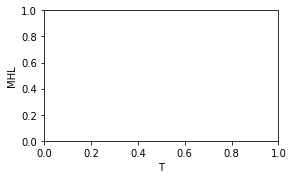

In [4]:
plot_2fig(metric_ltl, metric_itl, metric_oracle, metric_inner_initial, metric_inner_oracle,
          metric_wbar, save_dir_path=save_dir, title=title, y_label=y_label, name=metric+str(x_right)+'_plus')